# 메일 발신인 빈도수 파악하기

- selenium과 시각화 기법 활용
- 네이버 자동 로그인 및, 메일함에서 나에게 메일을 자주 보내는 발신인을 시각화해봅니다.

In [4]:
# 필요 라이브러리 호출

from selenium import webdriver
from selenium.webdriver import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.actions.action_builder import ActionBuilder
from selenium.webdriver import Keys, ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import pyperclip

# selenium에서 user-agent추가 : 딕셔너리 아닌 문자열 형태
opt = webdriver.ChromeOptions()
user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15"

opt.add_argument('user_agent=' + user_agent)


- 네이버 자동 로그인

In [5]:
# driver를 이용해 해당 사이트에 요청을 보내봅시다.
import time

#driver 객체 생성 : 추가했던 option을 추가하기
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.naver.com/')
#driver.implicitly_wait(10)
time.sleep(1)

# 내비게이션 바에서 "로그인" 버튼을 찾아 눌러봅시다.
button = driver.find_element(By.CLASS_NAME, 'MyView-module__link_login___HpHMW')
ActionChains(driver).click(button).perform()
# time.sleep(1) : 이후 명시적 wait의 실행

# "아이디" input 요소에 여러분의 아이디를 입력합니다. : 
# id_input = driver.find_element(By.ID,'query')
id_input = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.ID,'id')))

ActionChains(driver).click(id_input).perform() # ID창 클릭
pyperclip.copy('----') # ID입력 - 복사
# ActionChains(driver).send_keys(Keys.COMMAND + 'v').perform() : 수행되지 않음
ActionChains(driver).key_down(Keys.COMMAND).send_keys('v').key_up(Keys.CONTROL).perform()
time.sleep(1)

# # "패스워드" input 요소에 여러분의 비밀번호를 입력합니다.
pw_input = driver.find_element(By.ID,'pw')
ActionChains(driver).click(pw_input).perform() # PW창 클릭
pyperclip.copy('----') # PW입력 - 복사
ActionChains(driver).key_down(Keys.COMMAND).send_keys('v').key_up(Keys.CONTROL).perform()
# ActionChains(driver).send_keys_to_element(pw_input,"string~").perform() : 'string~'이라는 문자열로 그대로 입력하는 방법
time.sleep(1)

# # "로그인" 버튼을 눌러서 로그인을 완료합니다.
login_button = driver.find_element(By.ID , 'log.login')
ActionChains(driver).click(login_button).perform()
time.sleep(1)

# 메일 버튼 클릭
mail_button1 = driver.find_element(By.CLASS_NAME, 'MyView-module__item_text___VTQQM')
ActionChains(driver).click(mail_button1).perform()

# LINK_TEXT를 이용해 링크 클릭
mail_button2 = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.LINK_TEXT,'메일')))
ActionChains(driver).click(mail_button2).perform()

# 탭 목록 확인
# driver.window_handles
new_tab = driver.window_handles[-1]
driver.switch_to.window(window_name=new_tab)

# 메일 첫 화면 x표 누르기
x_button = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'button_svg_close')))
ActionChains(driver).click(x_button).perform()


- 나에게 자주 메일을 보낸 발신인 파악하기

In [6]:
mail_from = []

for _ in range(52):
    time.sleep(0.5)
    senders = driver.find_elements(By.CLASS_NAME,'button_sender')
    mail_from += [sender.text.lstrip('보낸 사람\n') for sender in senders ]
    
    next_button = driver.find_element(By.CLASS_NAME,'button_next')
    ActionChains(driver).click(next_button).perform()

In [7]:
len(mail_from)

1559

In [8]:
from collections import Counter
cnt_sender = Counter(mail_from)
freq = cnt_sender.most_common(20)
x = list(map(lambda x : x[0],freq))
y = list(map(lambda x : x[1],freq))
x

['서울시청',
 '한경 💌 경제야 놀자',
 'YouVersion',
 'Apple',
 'Netflix',
 'Google',
 '네이버',
 '네이버 클라우드 플랫폼',
 'SHEIN',
 'GitHub',
 'KB국민은행',
 '플레이라이프',
 '토스뱅크',
 'Lime Receipts',
 'Lime',
 'Slack',
 'study@ssu.ac.kr',
 '인터넷우체국',
 'iCloud',
 '중고나라']

- 시각화

/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/jykim/opt/anaconda3/envs/DevCourse_6/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

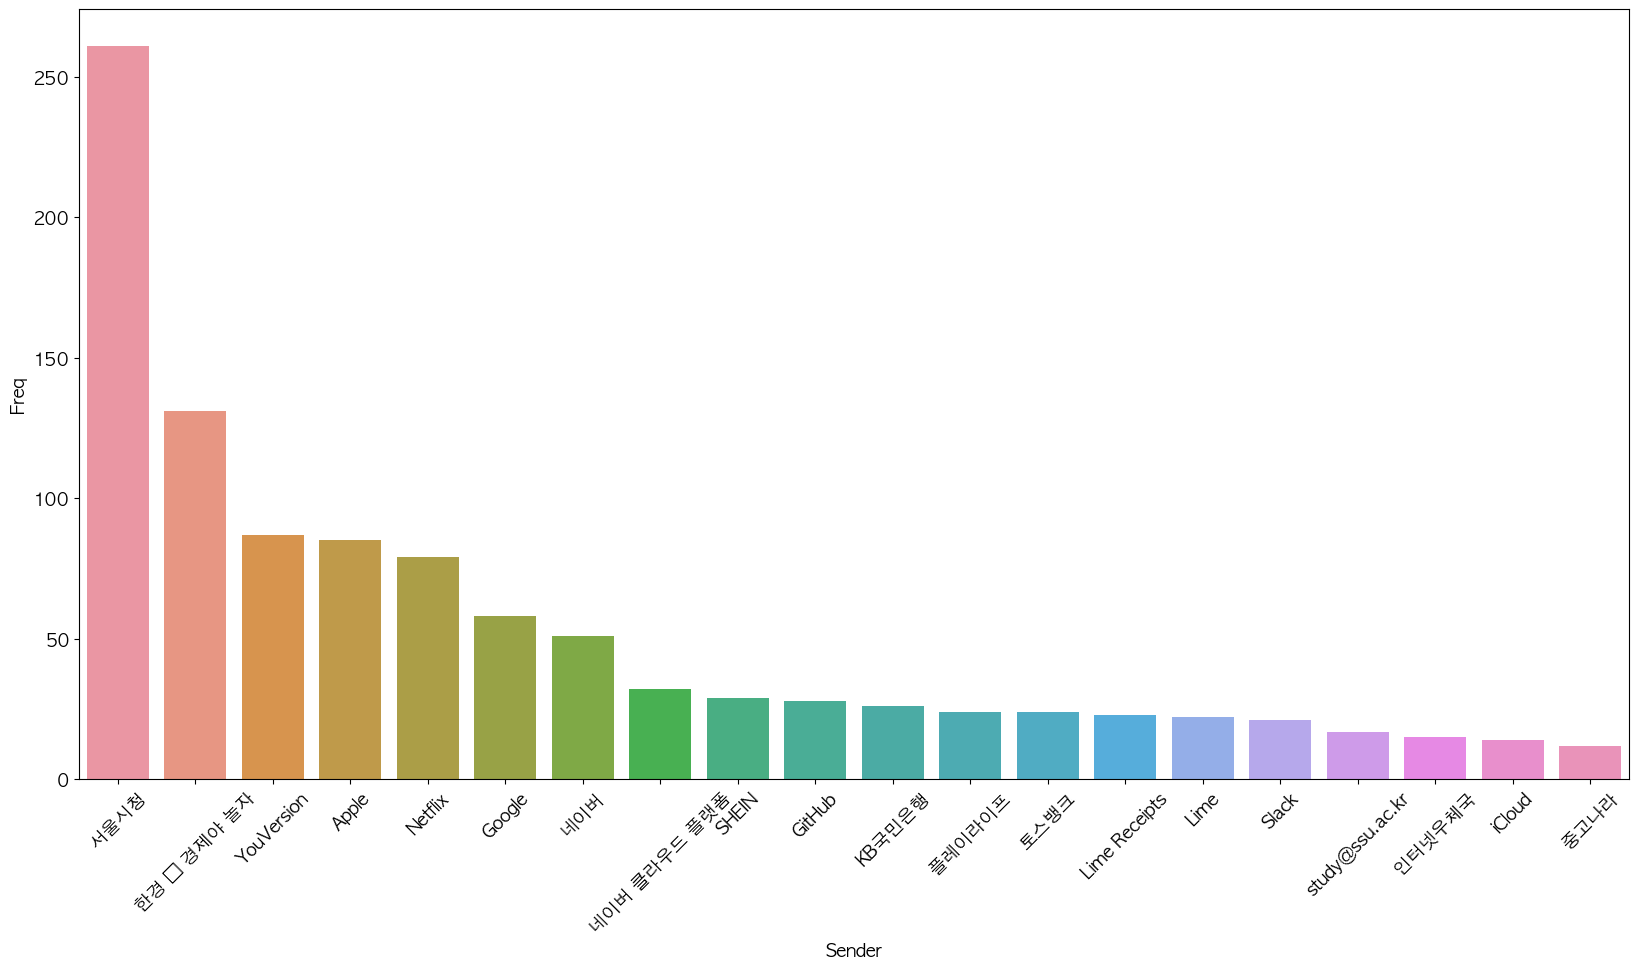

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.rcParams['font.family'] = 'AppleGothic' # 한글 폰트 사용
plt.rc('font',size=13)
plt.xlabel('Sender')
plt.ylabel('Freq')
plt.xticks(rotation=45)

sns.barplot(x=x,y=y)
plt.show()